## `doralite` API Examples

Here are some examples for using the light-weight API for interacting with the Dora website in a Jupyter notebook

In [1]:
%matplotlib inline

import doralite
import pandas as pd
import seaborn as sns
import subprocess
import xarray as xr

### Search Dora for Experiments

Using the string 'OM4p125', we can search Dora for all matching experiments:

In [2]:
doralite.search('OM4p125')

* 1085 /archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p125_IAF_csf_JRA55do1-3_cycle1/gfdl.ncrc4-intel16-prod/pp
* 1086 /archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p125_IAF_csf/gfdl.ncrc4-intel16-prod/pp
* 1087 /archive/ogrp/testing_20180703_mom6_2018.04.11/OM4p125_NYF_baseline/gfdl.ncrc4-intel16-prod/pp
* 1100 /archive/oar.gfdl.ogrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p125_IAF_csf_JRA55do1-3_r2_cycle1/gfdl.ncrc4-intel16-prod/pp
* 1116 /archive/oar.gfdl.ogrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p125_IAF_csf_JRA55do1-3_OcnAlbOpt5_cycle1/gfdl.ncrc4-intel16-prod/pp
* 1151 /archive/oar.gfdl.ogrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p125_IAF_csf_JRA55do1-3_r2_cycle2/gfdl.ncrc4-intel16-prod/pp
* 1163 /archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r4_cycle1/gfdl.ncrc4-intel16f2-prod/pp
* 1164 /archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_CORE2_r4/gf

### Obtain Metadata for an Experiment

Once we know the id number for an experiment, the API can return a dictionary with the metadata associated with that experiment.

In [3]:
metadata = doralite.dora_metadata(1433)
for k in sorted(metadata.keys()):
    print(f'{k}: {metadata[k]}')

displayName: None
expLabels: c192_omp125_prototype,2010climo,engineering_run
expLength: 10
expMIP: None
expName: CM4_2010Control_C_noBLING_c192_OM4p125
expType: 2kControl
id: 1433
label: CM4_2010Control_C_noBLING_c192_OM4p125
modelType: CM4
pathAnalysis: /nbhome/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/
pathDB: /gfdlhome/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/db/
pathHistory: /archive/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/history/
pathLog: None
pathPP: /archive/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/pp/
pathScript: /lustre/f2/dev/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/ncrc4.intel18-prod-openmp/scripts/
pathXML: /home/Niki.Zadeh/ncrc/xmls/xanadu/mdt_xml_RT

### Obtaining Global Mean Data as a DataFrame

The API can return a Pandas DataFrame for a given experiment id.  The dataframe can then be plotted, analyzed, and exported to a NumPy array

In [4]:
df = doralite.global_mean_data(1433,'globalAveOcean')
df.head()

,ave_wfo,ave_hfds,masso,ave_hflso,ave_hfsso,soga,net_heat_coupler_ga,ave_rlntds,thetaoga,ave_evs,ssh_ga,tosga,sosga,volo,precip_ga,ave_rsntds,LwLatSens_ga
date,,,,,,,,,,,,,,,,,
0001-07-01 12:00:00,-3.237439e-06,0.112207,1.378851e+21,-104.949255,-15.138810,34.720440,0.560376,-54.813927,3.586401,-0.000042,-0.075355,18.216041,34.700939,1.332220e+18,0.000037,175.462369,-174.901993
0002-07-01 12:00:00,-8.703284e-07,0.447671,1.378831e+21,-104.256620,-15.169945,34.720913,0.744834,-53.372849,3.588662,-0.000041,-0.126596,18.291863,34.679731,1.332202e+18,0.000038,173.544249,-172.799414
0003-07-01 12:00:00,-5.561459e-07,0.698864,1.378824e+21,-104.417417,-15.230234,34.721097,0.987850,-53.610644,3.589894,-0.000042,-0.146196,18.371185,34.667507,1.332195e+18,0.000038,174.246146,-173.258295
0004-07-01 12:00:00,-1.710210e-07,0.651254,1.378822e+21,-104.624113,-14.902846,34.721154,0.925472,-53.518149,3.591107,-0.000042,-0.151988,18.422346,34.662310,1.332192e+18,0.000038,173.970580,-173.045108
0005-07-01 12:00:00,-2.760897e-07,0.957084,1.378818e+21,-104.513445,-15.093424,34.721258,1.207423,-53.755142,3.593079,-0.000042,-0.163021,18.414486,34.658209,1.332188e+18,0.000038,174.569433,-173.362011


##### Simple plot of SST

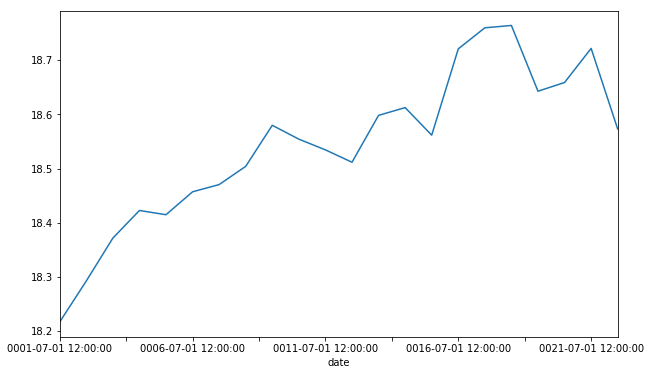

In [5]:
df.tosga.plot(figsize=(10,6))

##### More complex plot with using seaborn

Here, we regress ocean volume mean temperature vs sea surface temperature

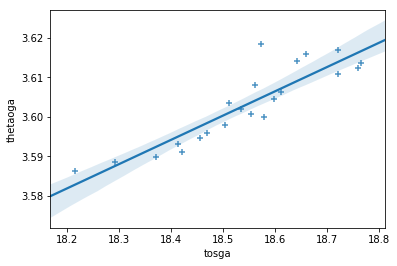

In [6]:
sns.regplot(x='tosga', y='thetaoga', marker="+", data=df)

##### Export variable to NumPy array

In [7]:
array = df.ssh_ga.to_numpy()
print(f'The shape of the array is {array.shape}')
print(f'The mean of the array is {array.mean()}')
print(f'The standard deviation of the array is {array.std()}')

The shape of the array is (22,)
The mean of the array is -0.16301918291157272
The standard deviation of the array is 0.022202487558102956


### Example Workflow to Plot SST (`thetao` at the surface)

In [9]:
# Get metadata about experiment 1433
metadata = doralite.dora_metadata(1433)

# Construct a path to a file containing thetao
filepath = metadata['pathPP']+'ocean_annual_z/ts/annual/10yr/ocean_annual_z.0001-0010.thetao.nc'
print(filepath)

# consider dmgetting the file first, otherwise load file as an xarray dataset
ds = xr.open_dataset(filepath)
print(ds)

/archive/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ts/annual/10yr/ocean_annual_z.0001-0010.thetao.nc
<xarray.Dataset>
Dimensions:     (nv: 2, time: 10, xh: 2880, yh: 2240, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0001-07-02 12:00:00 ... 0010-07-02 12:00:00
  * xh          (xh) float64 -298.6 -298.5 -298.4 -298.3 ... 61.05 61.16 61.28
  * yh          (yh) float64 -83.62 -83.58 -83.54 -83.5 ... 89.86 89.92 89.97
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    thetao      (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object ...
Attributes:
    filename:            ocean_annual_z.0001-0010

Make a map of the surface values at year 10

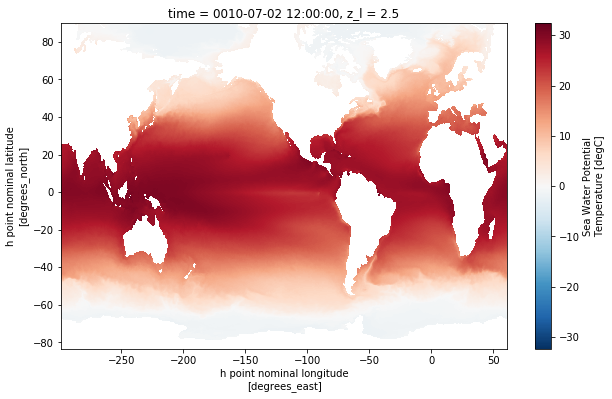

In [10]:
ds.thetao.sel(time='0010-07-02',z_l=2.5).plot(figsize=(10,6))

In [11]:
# close the dataset
ds.close()